# What is COVID-19 and implication on Hospital Capacity?

COVID-19 is a respiratory illness caused by a new virus. Symptoms include fever, coughing, sore throat and shortness of breath. The virus can spread from person to person, but good hygiene can prevent infection. As it is new virus so there is no cure available for this illness , only cure is prevention which is "Maintaining Social Distance".

Our health system capacity is at risk of being overwhelmed and as per learning from other locations in US we might completely fill all of our ICU beds with COVID19 patients as currently in YS ICUs typically operate at around 70% occupancy (or up to 90% in a particularly bad flu season) which means critically ill COVID patients (or non-COVID patients who need it) may not get ICU level of care due to lack of available beds or staffing or equipment. Based on this hospital in US are expanding in new or existing location.

# Goal 1 : Prioritizing hospitals where more capacity is needed  based bed supply/demand mismatch tag the geolocation data on latitude & longitude level.

Know the baseline capacity of healthcare systems to enough granularity for localized decisionmaking at the city, county, and state levels:

## Task 1: Researching and sourcing data
### Data sources for cases, healthcare facilities, beds, care utilization,news at national, state, county level:-

We do open-source data collection from different sources around COVID-19, gealocation and latest from web.


HCRIS Medicare cost reporting data -https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/Cost-Reports

HIFLD hospital facilities data:- https://hifld-geoplatform.opendata.arcgis.com/datasets/hospitals

HIFLD US Hospital and Bed Data:- https://hifld-geoplatform.opendata.arcgis.com/datasets/hospitals/data

Definitive Health hospital open data Dashboard:- https://www.arcgis.com/apps/opsdashboard/index.html#/8c4dcccd9e3845eb89f6401f919007f2

Daily data:-  https://covidtracking.com/

Longitudinal data tracking daily identified case counts for the United States at the county-level:-https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/ 

Projection:- https://covidactnow.org/state/IL

Twitter handles of Governors and health department:- https://en.wikipedia.org/wiki/List_of_United_States_governors

local newspapers: https://en.wikipedia.org/wiki/List_of_newspapers_in_the_United_States

Data number of tests conducted in each US state at daily level:- https://covidtracking.com/

COVID-19 Cases provided by Johns Hopkins University:- https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data

Daily geographic distribution of COVID-19:-https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide 

US Census Block geography ID information given a passed Latitude and Longitude:-https://catalog.data.gov/dataset/census-api-by-coordinates

OECD Hospital Beds Per 1000 Inhabitant:-https://data.oecd.org/healtheqt/hospital-beds.htm

State government COVID-19 Data:-
https://www.cdph.ca.gov/Programs/OPA/Pages/NR20-32.aspx

https://covid19.colorado.gov/case-data

https://portal.ct.gov/-/media/Coronavirus/CTDPHCOVID19summary3242020.pdf?la=en

https://experience.arcgis.com/experience/96dd742462124fa0b38ddedb9b25e429/

https://dph.georgia.gov/covid-19-daily-status-report

https://idph.iowa.gov/Emerging-Health-Issues/Novel-Coronavirus

http://ldh.la.gov/Coronavirus/

https://www.maine.gov/dhhs/mecdc/infectious-disease/epi/airborne/coronavirus.shtml

https://coronavirus.maryland.gov

https://www.mass.gov/doc/covid-19-cases-in-massachusetts-as-of-march-24-2020/download

https://www.michigan.gov/coronavirus/0,9753,7-406-98163-520743--,00.html

https://msdh.ms.gov/msdhsite/_static/14,0,420.html

https://app.powerbigov.us/view?r=eyJrIjoiMjA2ZThiOWUtM2FlNS00MGY5LWFmYjUtNmQwNTQ3Nzg5N2I2IiwidCI6ImU0YTM0MGU2LWI4OWUtNGU2OC04ZWFhLTE1NDRkMjcwMzk4MCJ9

https://govstatus.egov.com/OR-OHA-COVID-19

https://scdhec.gov/infectious-diseases/viruses/coronavirus-disease-2019-covid-19/monitoring-testing-covid-19

https://www.doh.wa.gov/Emergencies/Coronavirus

https://www1.nyc.gov/assets/doh/downloads/pdf/imm/covid-19-daily-data-summary.pdf




## Task 2 Data Ingestion and Cleaning 

  ### Task 2.1 Ingesting datasets and cleaning up things

Design and create data ccollection process to maintain as close to an real-time, verified dataset and understanding of healthsystem capacity at the facility at nation/county/hospital region level nationwide 

  ### Task 2.2 Building data validation and error correction systems

Put the data quality process to validate the data and preperae the data

  ### Task 2.3 Combining datasets for different sources

Clean-up and bring together into data-science ready formats for further processing.


## Task 3 EDA: Visualizations and Dashboards

Exploratory data analysis on Demand/Supply to identify where, when, and how large care capacity gaps remain and emerge

Track/estimate progress in ramping up capacity in response/preparation for patient demand at the facility, county, state, national levels

Dashboards built on top of this dynamically updating health systems capacity and forecasted/reported case load data with scenario modeling 

## Task 4 Modeling: Forecasting the capacity need

Predict potential location where hospitals are or will be expanding their facilities.

  ### Task 4.1 Model Validation 
  
Validate the locations with other sources

## Task 5 Identify the expansion sites

Using the predcited location prioritize different hospitals and identify New/Existing Hospital Expansion sites on latitude & longitude level.



In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

pd.options.mode.chained_assignment = None



In [2]:
# Read the data
us_df = pd.read_csv("us-daily.csv")
us_states_df = pd.read_csv("states-daily.csv")
us_df["date"] = pd.to_datetime(us_df["date"], format="%Y%m%d")
us_states_df = us_states_df.reindex(index=us_states_df.index[::-1])
us_states_df["date"] = pd.to_datetime(us_states_df["date"], format="%Y%m%d").dt.date.astype(str)
us_states_df.head()

date state  positive  negative  pending  hospitalized  death  \
1316  2020-03-04    WI       1.0      19.0      6.0           NaN    NaN   
1315  2020-03-04    WA      39.0       NaN      NaN           NaN    NaN   
1314  2020-03-04    TX       1.0       NaN      NaN           NaN    NaN   
1313  2020-03-04    SC       0.0       5.0      0.0           NaN    NaN   
1312  2020-03-04    OR       3.0      29.0     18.0           NaN    NaN   

      total                                      hash           dateChecked  \
1316     26  0f8cc0d051348c50905a5d5b43ba3c5e23897523  2020-03-04T21:00:00Z   
1315     39  36ea36bcf282dcc480c83b6f2561810b009bc951  2020-03-04T21:00:00Z   
1314      1  7be175c20e3c9485c14f9764bd90385842df19c3  2020-03-04T21:00:00Z   
1313      5  992c7ca6f8259ac7a323c0b92c27123c671f3773  2020-03-04T21:00:00Z   
1312     50  5b37d7f2e6aa9fb39e09270626674b16ce9b5182  2020-03-04T21:00:00Z   

      totalTestResults  fips  deathIncrease  hospitalizedIncrease  \
1316                20    55            NaN                   NaN   
1315                39    53            NaN                   NaN   
1314                 1    48            NaN                   NaN   
1313                 5    45            NaN                   NaN   
1312                32    41            NaN                   NaN   

      negativeIncrease  positiveIncrease  totalTestResultsIncrease  
1316               NaN               NaN                       NaN  
1315               NaN               NaN                       NaN  
1314               NaN               NaN                       NaN  
1313               NaN               NaN                       NaN  
1312               NaN               NaN                       NaN

In [3]:
# US state code to name mapping
state_map_dict = {'AL': 'Alabama',
 'AK': 'Alaska',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'AR': 'Arkansas',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DE': 'Delaware',
 'DC': 'District of Columbia',
 'D.C.': 'District of Columbia',
 'FM': 'Federated States of Micronesia',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'IA': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'ME': 'Maine',
 'MH': 'Marshall Islands',
 'MD': 'Maryland',
 'MA': 'Massachusetts',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MS': 'Mississippi',
 'MO': 'Missouri',
 'MT': 'Montana',
 'NE': 'Nebraska',
 'NV': 'Nevada',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NY': 'New York',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'MP': 'Northern Mariana Islands',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PW': 'Palau',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VT': 'Vermont',
 'VI': 'Virgin Islands',
 'VA': 'Virginia',
 'WA': 'Washington',
 'WV': 'West Virginia',
 'WI': 'Wisconsin',
 'WY': 'Wyoming'}

state_code_dict = {v:k for k, v in state_map_dict.items()}
state_code_dict["Chicago"] = 'Illinois'

def correct_state_names(x):
    try:
        return state_map_dict[x.split(",")[-1].strip()]
    except:
        return x.strip()
    
def get_state_codes(x):
    try:
        return state_code_dict[x]
    except:
        return "Others"

covid_19_df = pd.read_csv("covid_19_data.csv")
us_covid_df = covid_19_df[covid_19_df["Country/Region"]=="US"]
us_covid_df["Province/State"] = us_covid_df["Province/State"].apply(correct_state_names)
us_covid_df["StateCode"] = us_covid_df["Province/State"].apply(lambda x: get_state_codes(x))

cumulative_df = us_covid_df.groupby("ObservationDate")["Confirmed", "Deaths", "Recovered"].sum().reset_index()

### Plot for number of cumulative covid cases over time
fig = px.bar(cumulative_df, x="ObservationDate", y="Confirmed")
layout = go.Layout(
    title=go.layout.Title(
        text="Daily cumulative count of confirmed COVID-19 cases in US",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
    xaxis_title = "Date of observation",
    yaxis_title = "Number of confirmed cases"
)

fig.update_layout(layout)
fig.show()

### Plot for number of cumulative covid cases over time
fig = px.bar(cumulative_df, x="ObservationDate", y="Deaths")
layout = go.Layout(
    title=go.layout.Title(
        text="Daily cumulative count of deaths due to COVID-19 in US",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
    xaxis_title = "Date of observation",
    yaxis_title = "Number of death cases"
)

fig.update_layout(layout)
fig.show()

### Plot for number of cumulative covid cases over time
cumulative_df["ConfirmedNew"] = cumulative_df["Confirmed"].diff() 
fig = px.bar(cumulative_df, x="ObservationDate", y="ConfirmedNew")
layout = go.Layout(
    title=go.layout.Title(
        text="Daily count of new confirmed COVID-19 cases in US",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
    xaxis_title = "Date of observation",
    yaxis_title = "Number of confirmed cases"
)

fig.update_layout(layout)
fig.show()


In [4]:
import datetime

cumulative_df = us_covid_df.groupby(["StateCode", "ObservationDate"])["Confirmed", "Deaths", "Recovered"].sum().reset_index()
cumulative_df["ObservationDate"] = pd.to_datetime(cumulative_df["ObservationDate"] , format="%m/%d/%Y").dt.date
cumulative_df = cumulative_df.sort_values(by="ObservationDate").reset_index(drop=True)
start_date = datetime.date(2020, 2, 25)
cumulative_df = cumulative_df[cumulative_df["ObservationDate"]>=start_date]
cumulative_df["ObservationDate"] = cumulative_df["ObservationDate"].astype(str)

fig = px.choropleth(locations=cumulative_df["StateCode"],
                    color=cumulative_df["Confirmed"], 
                    locationmode="USA-states",
                    scope="usa",
                    animation_frame=cumulative_df["ObservationDate"],
                    color_continuous_scale='Reds',
                    range_color=[0,55000]
                    #autocolorscale=False,
                   )

layout = go.Layout(
    title=go.layout.Title(
        text="Cumulative count of COVID-19 cases in US states",
        x=0.5
    ),
    font=dict(size=14),
)

fig.update_layout(layout)
fig.show()

In [5]:
cumulative_df = us_covid_df.groupby(["StateCode", "ObservationDate"])["Confirmed", "Deaths", "Recovered"].sum().reset_index()
cumulative_df["ObservationDate"] = pd.to_datetime(cumulative_df["ObservationDate"] , format="%m/%d/%Y").dt.date
cumulative_df = cumulative_df.sort_values(by="ObservationDate").reset_index(drop=True)
start_date = datetime.date(2020, 3, 10)
cumulative_df = cumulative_df[cumulative_df["ObservationDate"]>=start_date]
cumulative_df["ObservationDate"] = cumulative_df["ObservationDate"].astype(str)

fig = px.scatter(cumulative_df, x="Confirmed", y="Deaths", animation_frame="ObservationDate", animation_group="StateCode",
           size="Confirmed", color="StateCode", hover_name="StateCode",
           log_x=False, size_max=55, range_x=[0,55000], range_y=[-20,1000])

layout = go.Layout(
    title=go.layout.Title(
        text="Changes in number of confirmed & death cases over time in US states",
        x=0.5
    ),
    font=dict(size=14),
    xaxis_title = "Total number of confirmed cases",
    yaxis_title = "Total number of death cases"
)

fig.update_layout(layout)

fig.show()


In [6]:
fig = px.bar(us_df, x="date", y="total")

layout = go.Layout(
    title=go.layout.Title(
        text="Cumulative number of Total COVID-19 testing over time in US",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
    xaxis_title = "Date of observation",
    yaxis_title = "Number of covid-19 testings"
)

fig.update_layout(layout)
fig.show()


In [7]:
import plotly.express as px

us_states_df["positive"] = us_states_df["positive"].fillna(0)

fig = px.scatter(us_states_df, x="total", y="positive", animation_frame="date", animation_group="state",
           size="positive", color="state", hover_name="state",
           log_x=False, size_max=55, range_x=[0,200000], range_y=[0,55000])

layout = go.Layout(
    title=go.layout.Title(
        text="Total testing counts Vs Positive Counts over time",
        x=0.5
    ),
    font=dict(size=14),
#     width=800,
#     height=500,
    xaxis_title = "Total number of tests",
    yaxis_title = "Number of positive tests"
)

fig.update_layout(layout)
fig.show()

In [8]:
icu = pd.read_csv("icu_county_data.csv")
icu.head()

State   County  ICU Beds  Total Population  Population Aged 60+  \
0  Alabama  Autauga         6             55036                10523   
1  Alabama  Baldwin        51            203360                53519   
2  Alabama  Barbour         5             26201                 6150   
3  Alabama     Bibb         0             22580                 4773   
4  Alabama   Blount         6             57667                13600   

   Percent of Population Aged 60+  Residents Aged 60+ Per Each ICU Bed  
0                            19.1                               1754.0  
1                            26.3                               1049.0  
2                            23.5                               1230.0  
3                            21.1                                  NaN  
4                            23.6                               2267.0

In [9]:
fip_codes_df = pd.read_csv('https://raw.githubusercontent.com/kjhealy/fips-codes/master/county_fips_master.csv', encoding = "ISO-8859-1")

In [10]:
fip_codes_df['county_name'] = fip_codes_df['county_name'].apply(lambda x: x.replace(' County', ''))

In [11]:
fip_codes = fip_codes_df.set_index('county_name')['fips'].to_dict()

In [12]:
icu['county_fips_code'] = icu['County'].apply(lambda x: fip_codes.get(x))

In [13]:
icu.head()

State   County  ICU Beds  Total Population  Population Aged 60+  \
0  Alabama  Autauga         6             55036                10523   
1  Alabama  Baldwin        51            203360                53519   
2  Alabama  Barbour         5             26201                 6150   
3  Alabama     Bibb         0             22580                 4773   
4  Alabama   Blount         6             57667                13600   

   Percent of Population Aged 60+  Residents Aged 60+ Per Each ICU Bed  \
0                            19.1                               1754.0   
1                            26.3                               1049.0   
2                            23.5                               1230.0   
3                            21.1                                  NaN   
4                            23.6                               2267.0   

   county_fips_code  
0            1001.0  
1           13009.0  
2           54001.0  
3           13021.0  
4           47009.0

In [14]:
icu_county = icu[pd.notnull(icu['county_fips_code'])]

In [15]:
icu_county.head()

State   County  ICU Beds  Total Population  Population Aged 60+  \
0  Alabama  Autauga         6             55036                10523   
1  Alabama  Baldwin        51            203360                53519   
2  Alabama  Barbour         5             26201                 6150   
3  Alabama     Bibb         0             22580                 4773   
4  Alabama   Blount         6             57667                13600   

   Percent of Population Aged 60+  Residents Aged 60+ Per Each ICU Bed  \
0                            19.1                               1754.0   
1                            26.3                               1049.0   
2                            23.5                               1230.0   
3                            21.1                                  NaN   
4                            23.6                               2267.0   

   county_fips_code  
0            1001.0  
1           13009.0  
2           54001.0  
3           13021.0  
4           47009.0

In [16]:
colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]
endpts = list(np.linspace(1, 12, len(colorscale) - 1))
fips = icu_county['county_fips_code'].tolist()
values = icu_county['ICU Beds'].tolist()

fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='ICU Beds per County',
    legend_title='Residents Aged 60+ Per Each ICU Bed'
)

fig.layout.template = None
fig.show()

In [17]:
icu_by_state = icu.groupby('State')[['ICU Beds']].sum()

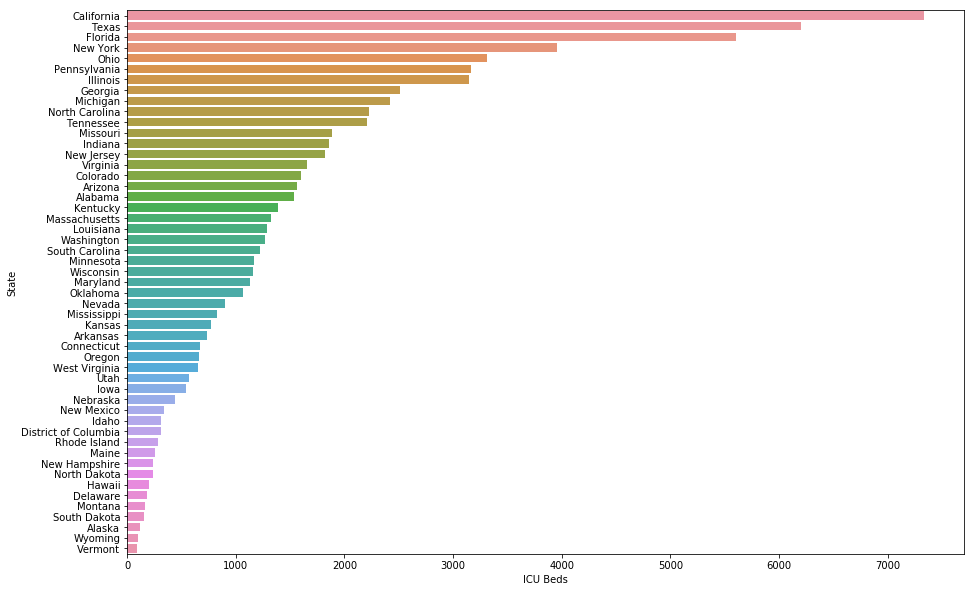

In [18]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='ICU Beds', y='State', data=icu_by_state.reset_index().sort_values(by=['ICU Beds'], ascending=False))

In [3]:
hrr = pd.read_csv("HRR Scorecard - 20% Population.csv")
hrr["ICU Beds Needed_Six Months"] = pd.to_numeric(hrr["ICU Beds Needed_Six Months"], errors='coerce')
hrr.head()
hrr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 36 columns):
HRR                                                                     305 non-null object
Total Hospital Beds                                                     305 non-null object
Total ICU Beds                                                          305 non-null object
Available Hospital Beds                                                 305 non-null object
Potentially Available Hospital Beds                                     305 non-null object
Available ICU Beds                                                      305 non-null int64
Potentially Available ICU Beds                                          305 non-null object
Adult Population                                                        305 non-null object
Population 65 above                                                     305 non-null object
Projected Infected Individuals                                      

HRR – Hospital Referral Region (HRR), specifying a market within which people generally go to the same hospitals

Total Hospital Beds – Count of all hospitable beds within an HRR that are set up and staffed

Total ICU Beds – Count of all ICU beds within an HRR that are set up and staffed

Available Hospital Beds – How many hospital beds are unoccupied at any given time, on average

Potentially Available Hospital Beds – How many beds could be available if occupancy rate was reduced by 50% for non-COVID patients 

Available ICU Beds  – How many ICU beds are unoccupied on average

Potentially Available ICU Beds – How many beds could be available if occupancy rate was reduced by 50% for non-COVID patients        

Adult Population – How many people over the age of 18 living within the HRR

Population 65+ – How many people over the age of 65 living within the HRR

Projected Infected Individuals – How many individuals over the age of 18 are expected to get infected with COVID-19 over the entire course of the pandemic

Projected Hospitalized Individuals – How many individuals over the age of 18 are expected to need hospitalization due to COVID-19 over the entire course of the pandemic        

Projected Individuals Needing ICU – How many individuals over the age of 18 are expected to need ICU care due to COVID-19 over the entire course of the pandemic           

Hospital/ICU Beds Needed, X Months – How many hospital/ICU beds would have to be available to care for all patients requiring hospital care within X months

Percentage of Available Hospital/ICU Beds Needed, X Months – What percentage of available hospital/ICU beds would need to be committed to COVID patients to care for all patients in X months

Percentage of Potentially Available Hospital/ICU Beds Needed, X Months – What percentage of potentially available hospital/ICU beds would need to be committed to COVID patients to care for all patients in X months

Percentage of Total Hospital/ICU Beds Needed, X Months – What percentage of all hospital/ICU beds would need to be committed to COVID patients to care for all patients in X months

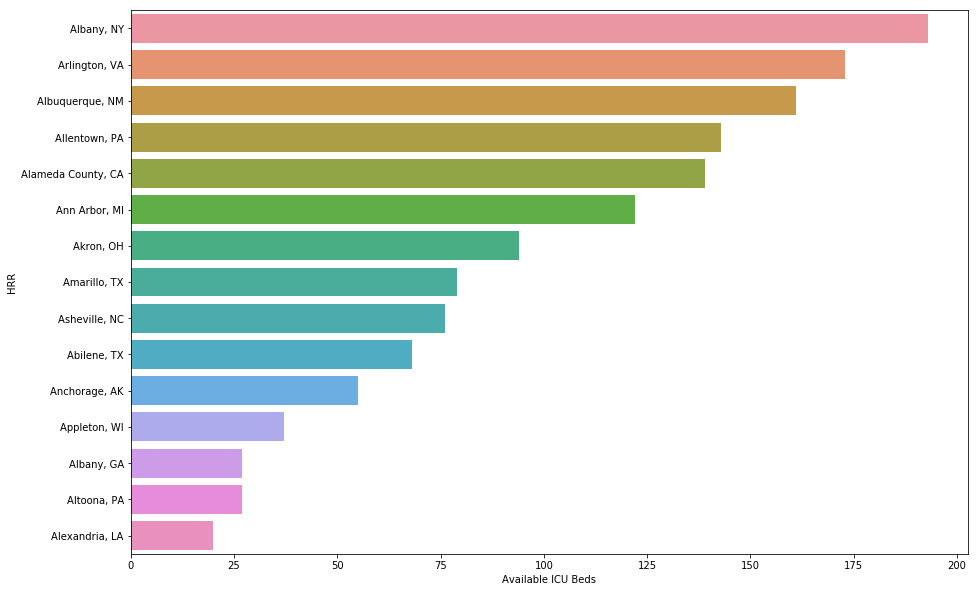

In [31]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='Available ICU Beds', y='HRR', data=hrr.iloc.reset_index().sort_values(by=['Available ICU Beds'], ascending=False))

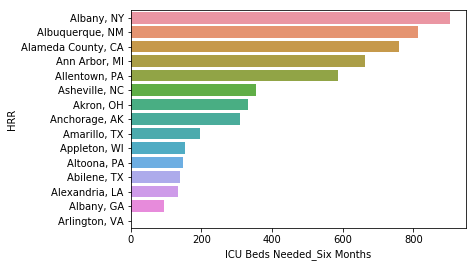

In [43]:
ax = sns.barplot(x='ICU Beds Needed_Six Months', y='HRR', data=hrr.iloc[:15].reset_index().sort_values(by=['ICU Beds Needed_Six Months'], ascending=False))